In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 6)

trips.head(), weather.head()

(            ride_id  rideable_type          started_at             ended_at  \
 0  CA5837152804D4B5  electric_bike 2022-01-26 18:50:39  2022-01-26 18:51:53   
 1  BA06A5E45B6601D2   classic_bike 2022-01-28 13:14:07  2022-01-28 13:20:23   
 2  7B6827D7B9508D93   classic_bike 2022-01-10 19:55:13  2022-01-10 20:00:37   
 3  6E5864EA6FCEC90D  electric_bike 2022-01-26 07:54:57  2022-01-26 07:55:22   
 4  E24954255BBDE32D  electric_bike 2022-01-13 18:44:46  2022-01-13 18:45:43   
 
      start_station_name start_station_id      end_station_name end_station_id  \
 0  12 St & Sinatra Dr N            HB201  12 St & Sinatra Dr N          HB201   
 1      Essex Light Rail            JC038      Essex Light Rail          JC038   
 2      Essex Light Rail            JC038      Essex Light Rail          JC038   
 3  12 St & Sinatra Dr N            HB201  12 St & Sinatra Dr N          HB201   
 4  12 St & Sinatra Dr N            HB201  12 St & Sinatra Dr N          HB201   
 
    start_lat  start_lng

In [3]:
import os
os.getcwd()

'C:\\Users\\User\\Downloads\\Citibike-Weather-Dashboard'

In [4]:
import os
os.listdir(".")

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'Data',
 'main',
 'Notebooks',
 'README.md',
 'Untitled.ipynb',
 'Untitled1.ipynb']

In [5]:
os.listdir("Data")

['.ipynb_checkpoints', 'Processed', 'Raw', 'Untitled.ipynb']

In [6]:
os.listdir(r"Data\Processed") 

['citibike_weather_daily_2022.csv']

In [7]:
TRIPS_PATH = r"Data\Processed\final_trips.parquet"
WEATHER_PATH = r"Data\Processed\weather.parquet"

In [8]:
import glob
glob.glob("**/*.parquet", recursive=True)

[]

In [10]:
import glob
glob.glob("**/*.csv", recursive=True), glob.glob("**/*.pkl", recursive=True), glob.glob("**/*.xlsx", recursive=True)

(['Data\\Processed\\citibike_weather_daily_2022.csv',
  'Data\\Raw\\weather_lga_2022.csv',
  'Data\\Raw\\citibike-2022\\JC-202201-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202202-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202203-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202204-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202205-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202206-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202207-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202208-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202209-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202210-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202211-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202212-citibike-tripdata.csv'],
 [],
 [])

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

plt.rcParams["figure.figsize"] = (12, 6)

WEATHER_PATH = r"Data\Processed\citibike_weather_daily_2022.csv"
weather = pd.read_csv(WEATHER_PATH)

weather.head()

,date,daily_trips,avg_trip_duration_min,precip_mm,temp_avg_c,temp_max_c,temp_min_c
0,2022-01-01,592,42.144369,19.3,11.6,13.9,10.0
1,2022-01-02,1248,27.255155,1.0,11.4,15.6,3.9
2,2022-01-03,832,24.766146,0.0,1.4,3.9,-4.3
3,2022-01-04,934,17.051035,0.0,-2.7,2.2,-6.0
4,2022-01-05,914,9.903556,6.1,3.2,8.9,0.0


In [12]:
possible_date_cols = [c for c in weather.columns if "date" in c.lower() or "time" in c.lower()]
possible_date_cols

['date']

In [13]:
WEATHER_DATE_COL = possible_date_cols[0]  
weather[WEATHER_DATE_COL] = pd.to_datetime(weather[WEATHER_DATE_COL])
weather = weather.set_index(WEATHER_DATE_COL).sort_index()

In [14]:
possible_temp_cols = [c for c in weather.columns if "temp" in c.lower() or "tavg" in c.lower() or "tmean" in c.lower()]
possible_temp_cols

['temp_avg_c', 'temp_max_c', 'temp_min_c']

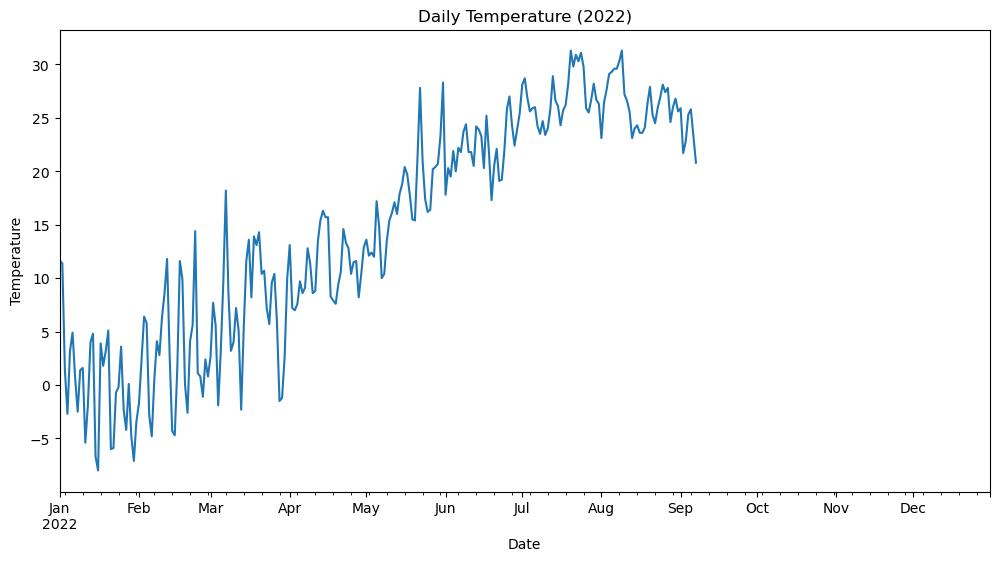

In [15]:
TEMP_COL = possible_temp_cols[0]  

ax = weather[TEMP_COL].plot(
    title="Daily Temperature (2022)",
    xlabel="Date",
    ylabel="Temperature"
)
plt.show()

In [16]:
trip_files = sorted(glob.glob(r"Data\Raw\citibike-2022\*.csv"))
trip_files

['Data\\Raw\\citibike-2022\\JC-202201-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202202-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202203-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202204-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202205-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202206-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202207-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202208-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202209-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202210-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202211-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202212-citibike-tripdata.csv']

In [17]:
trips = pd.concat((pd.read_csv(f) for f in trip_files), ignore_index=True)
trips.shape, trips.columns.tolist()[:20]

((895485, 13),
 ['ride_id',
  'rideable_type',
  'started_at',
  'ended_at',
  'start_station_name',
  'start_station_id',
  'end_station_name',
  'end_station_id',
  'start_lat',
  'start_lng',
  'end_lat',
  'end_lng',
  'member_casual'])

In [18]:
[c for c in trips.columns if "start" in c.lower() and ("time" in c.lower() or "at" in c.lower())]

['started_at', 'start_station_name', 'start_station_id', 'start_lat']

In [23]:
trips_per_day = (
    trips
    .set_index('started_at')
    .sort_index()
    .loc["2022-01-01":"2022-12-31"]
    .resample("D")
    .size()
    .rename("trip_count")
)

weather_2022 = weather.loc["2022-01-01":"2022-12-31"].copy()
weather_2022 = weather_2022.join(trips_per_day, how="left")
weather_2022["trip_count"] = weather_2022["trip_count"].fillna(0).astype(int)

weather_2022[["trip_count", TEMP_COL]].head()

,trip_count,temp_avg_c
date,,
2022-01-01,592,11.6
2022-01-02,1248,11.4
2022-01-03,832,1.4
2022-01-04,934,-2.7
2022-01-05,914,3.2


In [24]:
# 1) Trip start column (re)definition
if "started_at" in trips.columns:
    TRIP_START_COL = "started_at"
elif "starttime" in trips.columns:
    TRIP_START_COL = "starttime"
else:
    raise KeyError("Could not find 'started_at' or 'starttime' in trips.columns")

trips[TRIP_START_COL] = pd.to_datetime(trips[TRIP_START_COL])

# 2) Daily trip counts for 2022
trips_per_day = (
    trips
    .set_index(TRIP_START_COL)
    .sort_index()
    .loc["2022-01-01":"2022-12-31"]
    .resample("D")
    .size()
    .rename("trip_count")
)

# 3) Weather subset + merge
weather_2022 = weather.loc["2022-01-01":"2022-12-31"].copy()
weather_2022 = weather_2022.join(trips_per_day, how="left")
weather_2022["trip_count"] = weather_2022["trip_count"].fillna(0).astype(int)

weather_2022.head()

,daily_trips,avg_trip_duration_min,precip_mm,temp_avg_c,temp_max_c,temp_min_c,trip_count
date,,,,,,,
2022-01-01,592,42.144369,19.3,11.6,13.9,10.0,592
2022-01-02,1248,27.255155,1.0,11.4,15.6,3.9,1248
2022-01-03,832,24.766146,0.0,1.4,3.9,-4.3,832
2022-01-04,934,17.051035,0.0,-2.7,2.2,-6.0,934
2022-01-05,914,9.903556,6.1,3.2,8.9,0.0,914


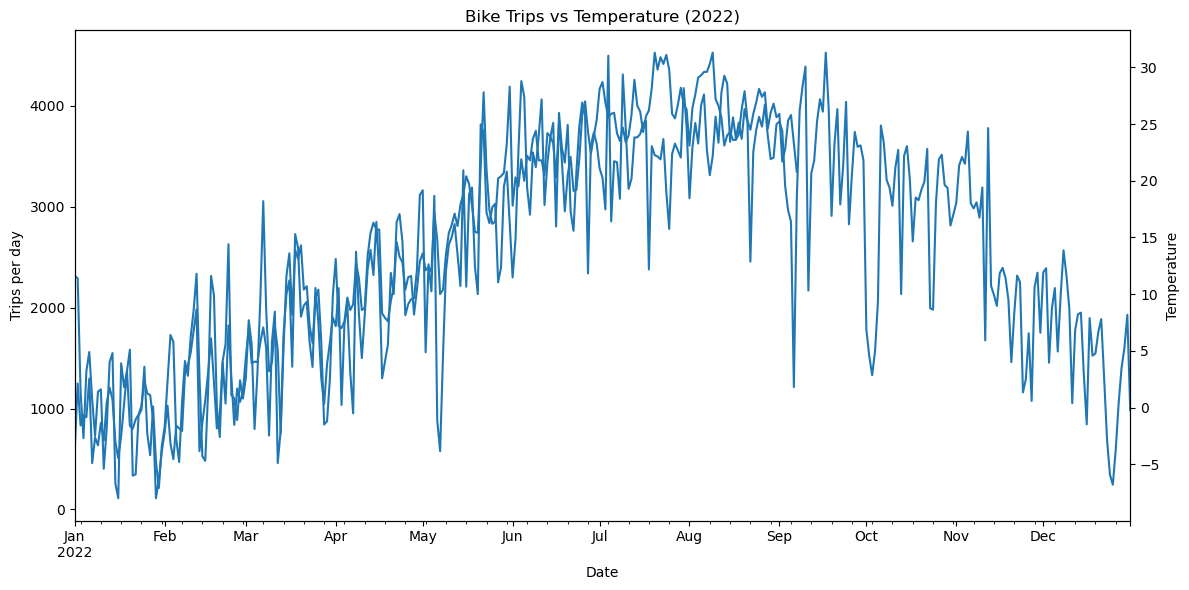

In [25]:
fig, ax1 = plt.subplots()

weather_2022["trip_count"].plot(ax=ax1)
ax1.set_xlabel("Date")
ax1.set_ylabel("Trips per day")
ax1.set_title("Bike Trips vs Temperature (2022)")

ax2 = ax1.twinx()
weather_2022[TEMP_COL].plot(ax=ax2)
ax2.set_ylabel("Temperature")

fig.tight_layout()
plt.show()

In [28]:
("weather_2022" in globals(), "trips_per_day" in globals(), "TEMP_COL" in globals())

(True, True, True)

Pandas was used to generate the line plots via the `.plot()` method, which uses
Matplotlib as its backend. For the dual-axis visualization, Matplotlib’s
object-oriented paradigm was applied by explicitly creating a figure and axes
using `plt.subplots()` and adding a secondary y-axis with `ax.twinx()`.

Each pandas plot was directed to a specific Matplotlib axis using the `ax=`
parameter. This approach provides fine-grained control over multiple axes and
is preferred over the state-based pyplot paradigm for more complex plots.